In [40]:
import numpy as np

In [41]:
import pandas as pd

In [42]:
np.random.seed(42)

In [43]:
employee_ids=[f'EMP_{i:03d}' for i in range(1,31)]
dates = pd.date_range("2025-07-01",periods=30,freq="D")

In [44]:
employee_ids

['EMP_001',
 'EMP_002',
 'EMP_003',
 'EMP_004',
 'EMP_005',
 'EMP_006',
 'EMP_007',
 'EMP_008',
 'EMP_009',
 'EMP_010',
 'EMP_011',
 'EMP_012',
 'EMP_013',
 'EMP_014',
 'EMP_015',
 'EMP_016',
 'EMP_017',
 'EMP_018',
 'EMP_019',
 'EMP_020',
 'EMP_021',
 'EMP_022',
 'EMP_023',
 'EMP_024',
 'EMP_025',
 'EMP_026',
 'EMP_027',
 'EMP_028',
 'EMP_029',
 'EMP_030']

In [45]:
data={
    "Date":np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids,len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_ids)).round(2)
}

In [46]:
df=pd.DataFrame(data)


In [47]:
df.to_csv("employee_working_hours.csv",index=False)

In [49]:
#read from csv
df_csv=pd.read_csv("employee_working_hours.csv")

In [48]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
0  2025-07-01     EMP_001           5.25          False           False
1  2025-07-02     EMP_001           4.16           True           False
2  2025-07-03     EMP_001           5.09          False           False
3  2025-07-04     EMP_001           7.50          False           False
4  2025-07-05     EMP_001           6.53          False           False
       Working_Hours
count     900.000000
mean        7.016256
std         1.757421
min         4.030000
25%         5.430000
50%         7.075000
75%         8.532500
max        10.000000
30


In [50]:
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)


In [51]:
avg_hours=df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [52]:
threshold_low=5
threshold_high=9
df_csv["Low_Hour_Flag"]=df_csv["Working_Hours"]<threshold_low
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"]>threshold_high

In [53]:
print(df_csv[df_csv["Low_Hour_Flag"]| df_csv["High_Hour_Flag"]].head())

         Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1  2025-07-02     EMP_001           9.70          False            True
4  2025-07-05     EMP_001           4.94           True           False
5  2025-07-06     EMP_001           4.94           True           False
6  2025-07-07     EMP_001           4.35           True           False
7  2025-07-08     EMP_001           9.20          False            True


In [54]:
import matplotlib.pyplot as plt


In [56]:
import seaborn as sns

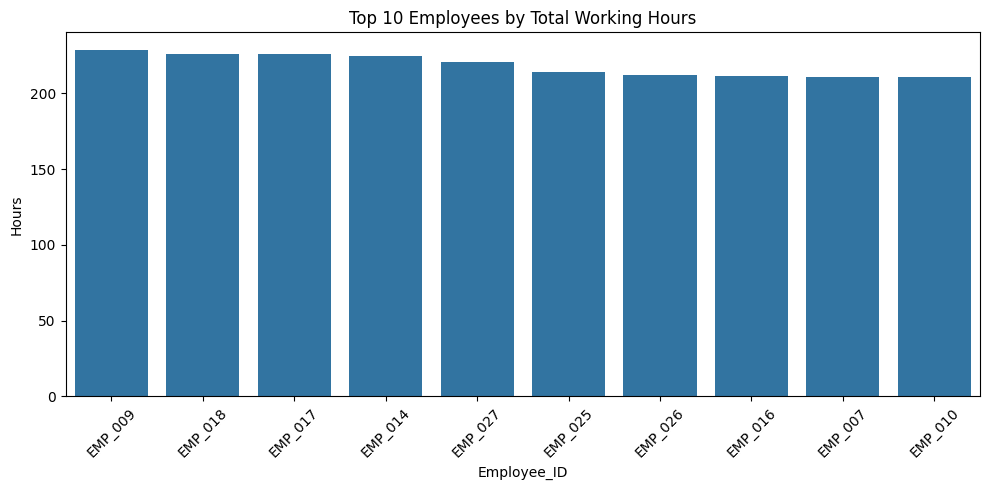

In [57]:
top10=total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

In [58]:
Grades=df.loc[(df["Employee_ID"]=="EMP_019")]

In [59]:
print(Grades)

          Date Employee_ID  Working_Hours
540 2025-07-01     EMP_019           9.72
541 2025-07-02     EMP_019           7.64
542 2025-07-03     EMP_019           5.37
543 2025-07-04     EMP_019           8.03
544 2025-07-05     EMP_019           7.71
545 2025-07-06     EMP_019           6.15
546 2025-07-07     EMP_019           4.68
547 2025-07-08     EMP_019           8.03
548 2025-07-09     EMP_019           7.12
549 2025-07-10     EMP_019           8.63
550 2025-07-11     EMP_019           7.12
551 2025-07-12     EMP_019           9.11
552 2025-07-13     EMP_019           7.31
553 2025-07-14     EMP_019           7.37
554 2025-07-15     EMP_019           9.26
555 2025-07-16     EMP_019           6.42
556 2025-07-17     EMP_019           4.80
557 2025-07-18     EMP_019           4.17
558 2025-07-19     EMP_019           8.53
559 2025-07-20     EMP_019           7.72
560 2025-07-21     EMP_019           8.22
561 2025-07-22     EMP_019           5.28
562 2025-07-23     EMP_019        